# Compare Embedding Experiment Runs for Next Word Prediction
These experiments fit an LSTM model as described in the research report using different embedding representations of words then fine tuning the embedding layer along with all other model layers over a fixed number of training rounds.  The notebooks is divided into three sections:
- Small network train and validation loss and accuracy
- Large network train and validation loss and accuracy
- Test set loss and accuracy

### Imports

In [1]:
import os, sys, io
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from src import dataset, validation

# Part 1: Small Network Loss and Accuracy

### Load Accuracy and Loss Arrays from Small Model (Batch Size 16)

In [4]:
epochs = 800
network = '100_256_100'

In [5]:
# random_train_loss = np.load('embedding_layer_results/random_{}/train_loss.npy'.format(network))[0:epochs]
# random_train_accuracy = np.load('embedding_layer_results/random_{}/train_accuracy.npy'.format(network))[0:epochs]
# random_val_loss = np.load('embedding_layer_results/random_{}/val_loss.npy'.format(network))[0:epochs]
# random_val_accuracy = np.load('embedding_layer_results/random_{}/val_accuracy.npy'.format(network))[0:epochs]

In [6]:
# glove_train_loss = np.load('embedding_layer_results/glove_{}/train_loss.npy'.format(network))[0:epochs]
# glove_train_accuracy = np.load('embedding_layer_results/glove_{}/train_accuracy.npy'.format(network))[0:epochs]
# glove_val_loss = np.load('embedding_layer_results/glove_{}/val_loss.npy'.format(network))[0:epochs]
# glove_val_accuracy = np.load('embedding_layer_results/glove_{}/val_accuracy.npy'.format(network))[0:epochs]

In [7]:
# pca_fasttext_train_loss = np.load('embedding_layer_results/pca_fasttext_{}/train_loss.npy'.format(network))[0:epochs]
# pca_fasttext_train_accuracy = np.load('embedding_layer_results/pca_fasttext_{}/train_accuracy.npy'.format(network))[0:epochs]
# pca_fasttext_val_loss = np.load('embedding_layer_results/pca_fasttext_{}/val_loss.npy'.format(network))[0:epochs]
# pca_fasttext_val_accuracy = np.load('embedding_layer_results/pca_fasttext_{}/val_accuracy.npy'.format(network))[0:epochs]

In [9]:
# pp_pca_pp_fasttext_train_loss = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/train_loss.npy'.format(network))[0:epochs]
# pp_pca_pp_fasttext_train_accuracy = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/train_accuracy.npy'.format(network))[0:epochs]
# pp_pca_pp_fasttext_val_loss = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/val_loss.npy'.format(network))[0:epochs]
# pp_pca_pp_fasttext_val_accuracy = np.load('embedding_layer_results/pp_pca_pp_fasttext_{}/val_accuracy.npy'.format(network))[0:epochs]

In [10]:
pca_gpt2_train_loss = np.load('embedding_layer_results/pca_gpt2_{}/train_loss.npy'.format(network))[0:epochs]
pca_gpt2_train_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/train_accuracy.npy'.format(network))[0:epochs]
pca_gpt2_val_loss = np.load('embedding_layer_results/pca_gpt2_{}/val_loss.npy'.format(network))[0:epochs]
pca_gpt2_val_accuracy = np.load('embedding_layer_results/pca_gpt2_{}/val_accuracy.npy'.format(network))[0:epochs]

In [11]:
pp_pca_pp_gpt2_train_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_loss.npy'.format(network))[0:epochs]
pp_pca_pp_gpt2_train_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_accuracy.npy'.format(network))[0:epochs]
pp_pca_pp_gpt2_val_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_loss.npy'.format(network))[0:epochs]
pp_pca_pp_gpt2_val_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_accuracy.npy'.format(network))[0:epochs]

### Plot Train and Validation Loss from Small Model

In [13]:
x_axis = range(0, epochs)

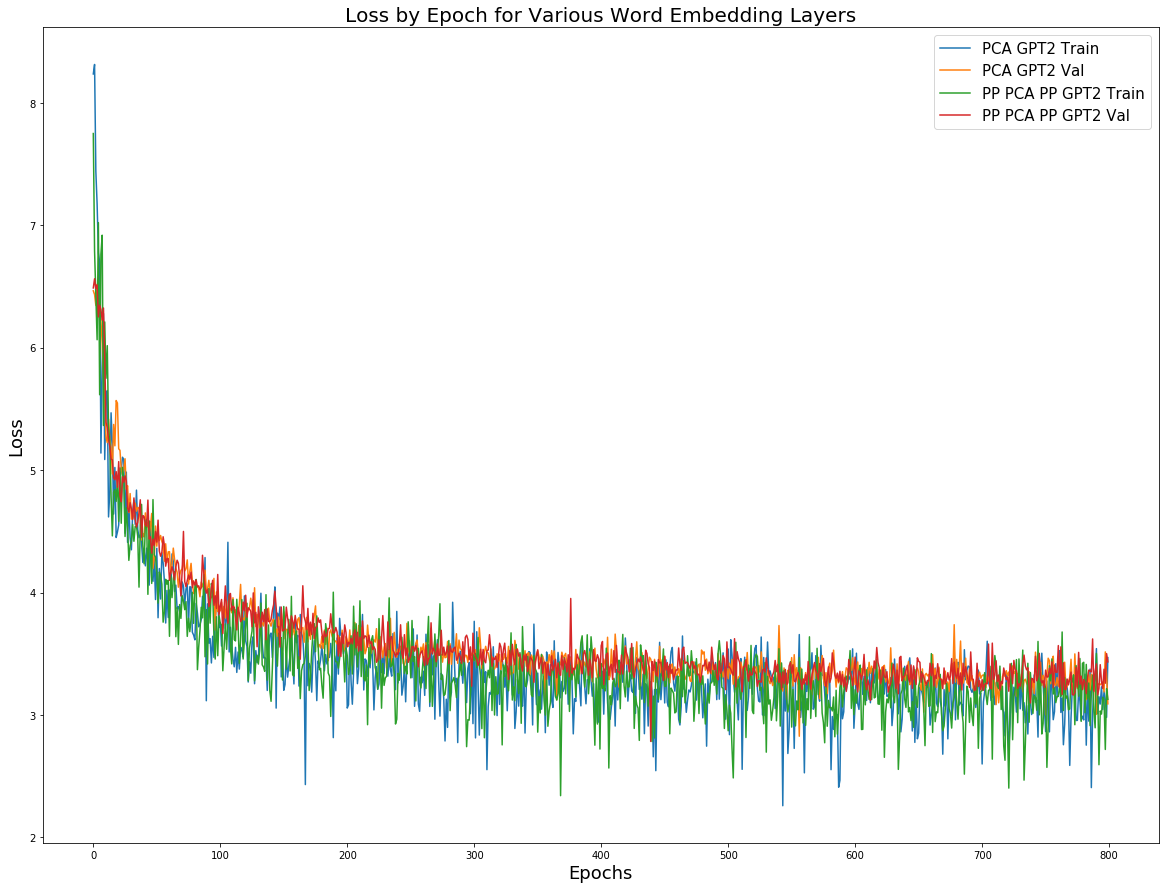

In [14]:
fig, ax = plt.subplots(figsize=(20, 15))
# ax.plot(x_axis, random_train_loss, label='Random Train')
# ax.plot(x_axis, random_val_loss, label='Random Val')
# ax.plot(x_axis, glove_train_loss, label='GloVe Train')
# ax.plot(x_axis, glove_val_loss, label='GloVe Val')
# ax.plot(x_axis, pca_fasttext_train_loss, label='PCA FastText Train')
# ax.plot(x_axis, pca_fasttext_val_loss, label='PCA FastText Val')
# ax.plot(x_axis, pp_pca_pp_fasttext_train_loss, label='PP PCA PP FastText Train')
# ax.plot(x_axis, pp_pca_pp_fasttext_val_loss, label='PP PCA PP FastText Val')
ax.plot(x_axis, pca_gpt2_train_loss, label='PCA GPT2 Train')
ax.plot(x_axis, pca_gpt2_val_loss, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_train_loss, label='PP PCA PP GPT2 Train')
ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Validation Loss from Small Model

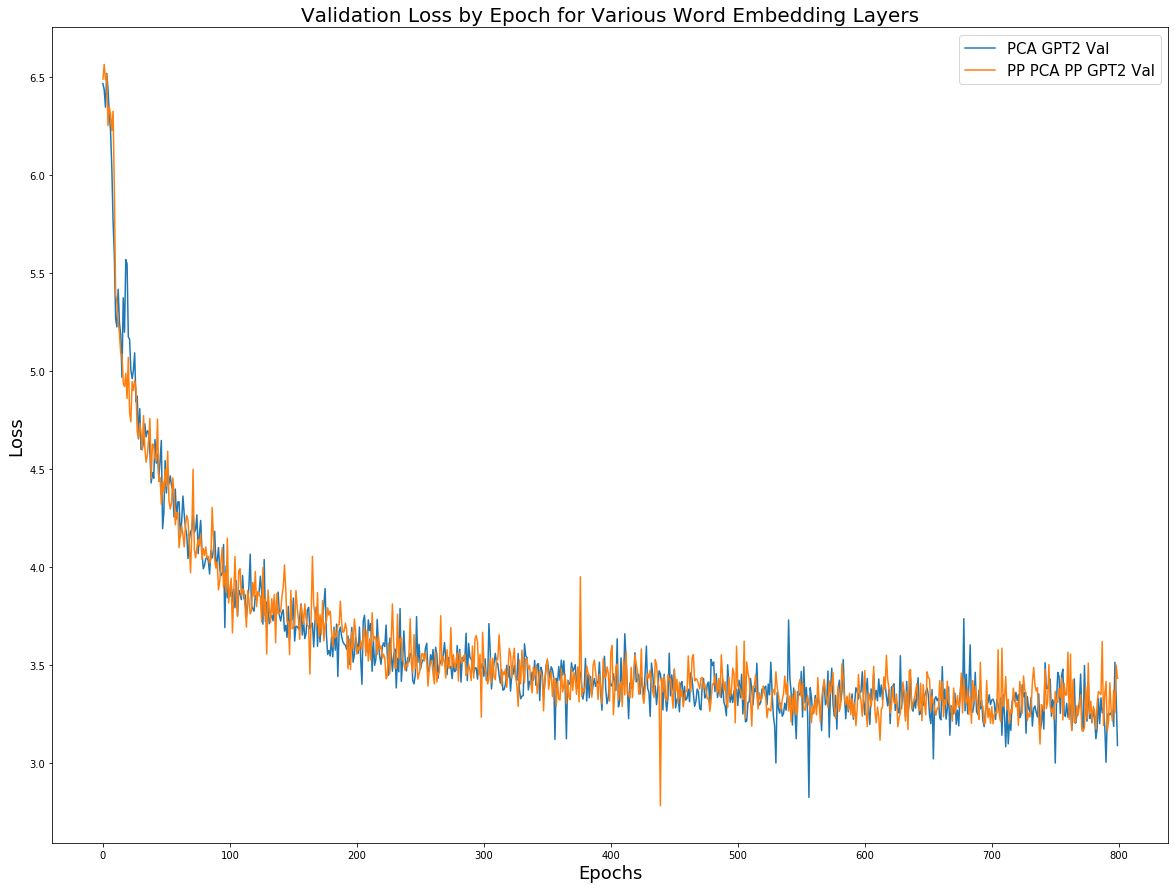

In [15]:
fig, ax = plt.subplots(figsize=(20, 15))
# ax.plot(x_axis, random_val_loss, label='Random Val')
# ax.plot(x_axis, glove_val_loss, label='GloVe Val')
# ax.plot(x_axis, pca_fasttext_val_loss, label='PCA FastText Val')
# ax.plot(x_axis, pp_pca_pp_fasttext_val_loss, label='PP PCA PP FastText Val')
ax.plot(x_axis, pca_gpt2_val_loss, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Train and Validation Accuracy from Small Model

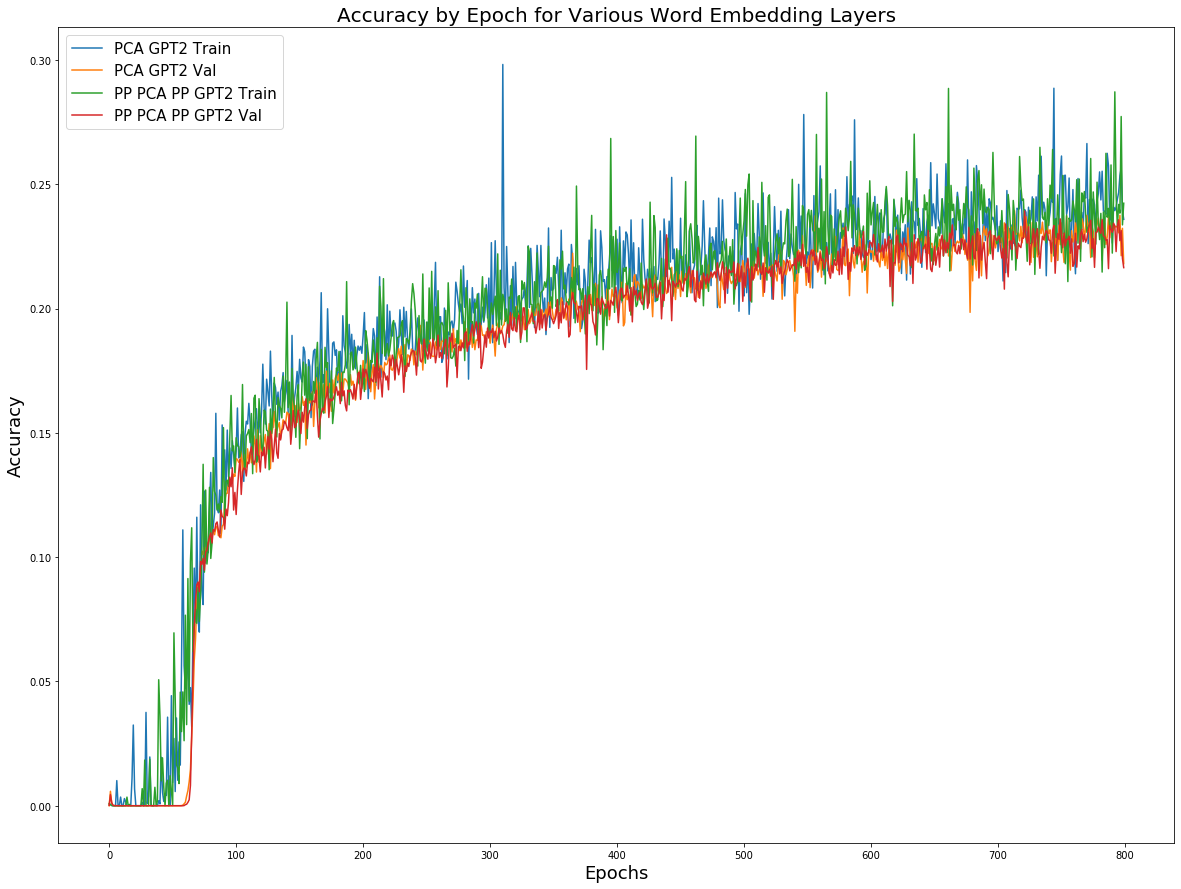

In [16]:
fig, ax = plt.subplots(figsize=(20, 15))
# ax.plot(x_axis, random_train_accuracy, label='Random Train')
# ax.plot(x_axis, random_val_accuracy, label='Random Val')
# ax.plot(x_axis, glove_train_accuracy, label='GloVe Train')
# ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
# ax.plot(x_axis, pca_fasttext_train_accuracy, label='PCA FastText Train')
# ax.plot(x_axis, pca_fasttext_val_accuracy, label='PCA FastText Val')
# ax.plot(x_axis, pp_pca_pp_fasttext_train_accuracy, label='PP PCA PP FastText Train')
# ax.plot(x_axis, pp_pca_pp_fasttext_val_accuracy, label='PP PCA PP FastText Val')
ax.plot(x_axis, pca_gpt2_train_accuracy, label='PCA GPT2 Train')
ax.plot(x_axis, pca_gpt2_val_accuracy, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_train_accuracy, label='PP PCA PP GPT2 Train')
ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

### Plot Validation Accuracy from Small Model

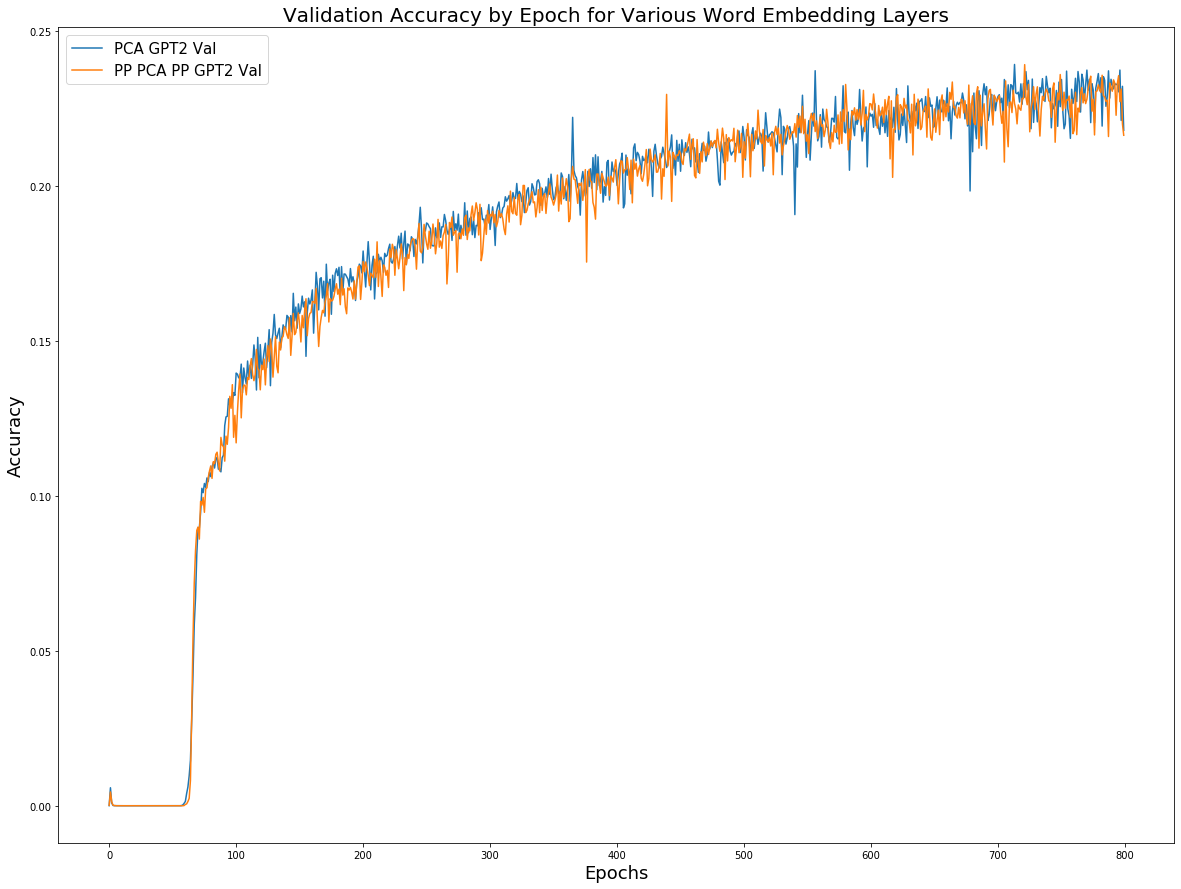

In [17]:
fig, ax = plt.subplots(figsize=(20, 15))
# ax.plot(x_axis, random_val_accuracy, label='Random Val')
# ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
# ax.plot(x_axis, pca_fasttext_val_accuracy, label='PCA FastText Val')
# ax.plot(x_axis, pp_pca_pp_fasttext_val_accuracy, label='PP PCA PP FastText Val')
ax.plot(x_axis, pca_gpt2_val_accuracy, label='PCA GPT2 Val')
ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

# Part 2: Large Network Loss and Accuracy

### Load Accuracy and Loss Arrays from Large Model (Batch Size 16)

In [11]:
epochs = 800
network = '300_512_300'

In [12]:
random_train_loss = np.load('embedding_layer_results/random_{}/train_loss.npy'.format(network))[0:epochs]
random_train_accuracy = np.load('embedding_layer_results/random_{}/train_accuracy.npy'.format(network))[0:epochs]
random_val_loss = np.load('embedding_layer_results/random_{}/val_loss.npy'.format(network))[0:epochs]
random_val_accuracy = np.load('embedding_layer_results/random_{}/val_accuracy.npy'.format(network))[0:epochs]

In [13]:
# glove_train_loss = np.load('embedding_layer_results/glove_{}/train_loss.npy'.format(network))[0:epochs]
# glove_train_accuracy = np.load('embedding_layer_results/glove_{}/train_accuracy.npy'.format(network))[0:epochs]
# glove_val_loss = np.load('embedding_layer_results/glove_{}/val_loss.npy'.format(network))[0:epochs]
# glove_val_accuracy = np.load('embedding_layer_results/glove_{}/val_accuracy.npy'.format(network))[0:epochs]

In [14]:
# fasttext_train_loss = np.load('embedding_layer_results/fasttext_{}/train_loss.npy'.format(network))[0:epochs]
# fasttext_train_accuracy = np.load('embedding_layer_results/fasttext_{}/train_accuracy.npy'.format(network))[0:epochs]
# fasttext_val_loss = np.load('embedding_layer_results/fasttext_{}/val_loss.npy'.format(network))[0:epochs]
# fasttext_val_accuracy = np.load('embedding_layer_results/fasttext_{}/val_accuracy.npy'.format(network))[0:epochs]

In [ ]:
# pp_pca_pp_gpt2_train_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_loss.npy'.format(network))[0:epochs]
# pp_pca_pp_gpt2_train_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/train_accuracy.npy'.format(network))[0:epochs]
# pp_pca_pp_gpt2_val_loss = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_loss.npy'.format(network))[0:epochs]
# pp_pca_pp_gpt2_val_accuracy = np.load('embedding_layer_results/pp_pca_pp_gpt2_{}/val_accuracy.npy'.format(network))[0:epochs]

### Plot Train and Validation Loss from Large Model

In [19]:
x_axis = range(0, epochs)

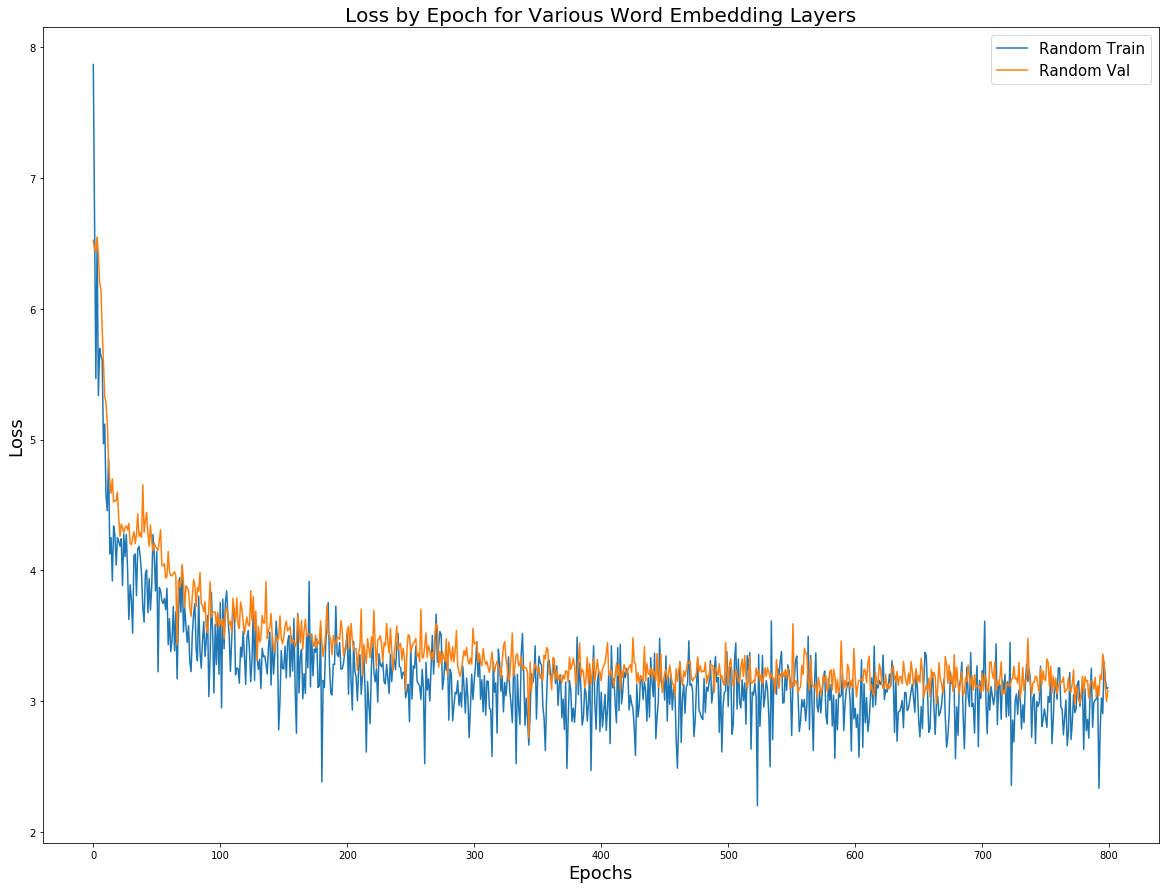

In [15]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_loss, label='Random Train')
ax.plot(x_axis, random_val_loss, label='Random Val')
# ax.plot(x_axis, glove_train_loss, label='GloVe Train')
# ax.plot(x_axis, glove_val_loss, label='GloVe Val')
# ax.plot(x_axis, fasttext_train_loss, label='FastText Train')
# ax.plot(x_axis, fasttext_val_loss, label='FastText Val')
# ax.plot(x_axis, pp_pca_pp_gpt2_train_loss, label='PP PCA PP GPT2 Train')
# ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Validation Loss from Large Model

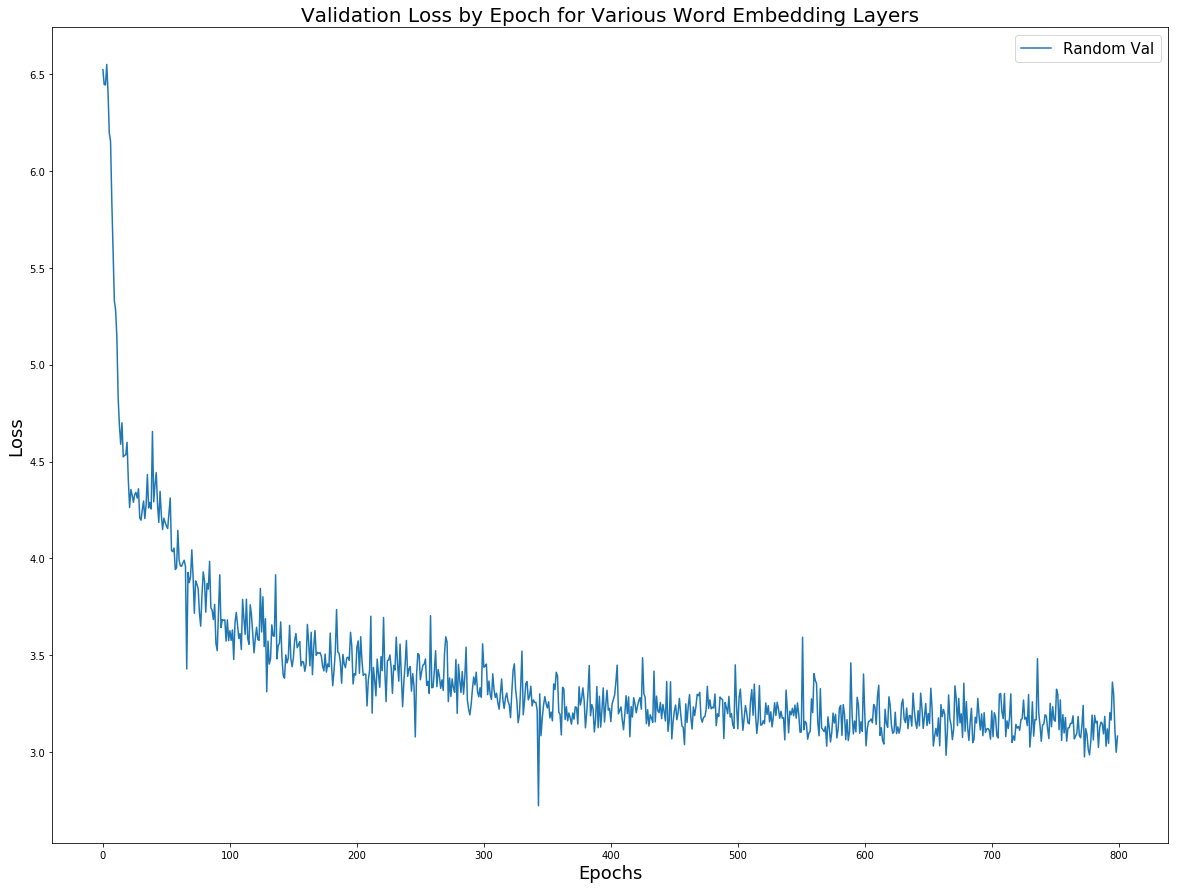

In [16]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_loss, label='Random Val')
# ax.plot(x_axis, glove_val_loss, label='GloVe Val')
# ax.plot(x_axis, fasttext_val_loss, label='FastText Val')
# ax.plot(x_axis, pp_pca_pp_gpt2_val_loss, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Loss by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

### Plot Train and Validation Accuracy from Large Model

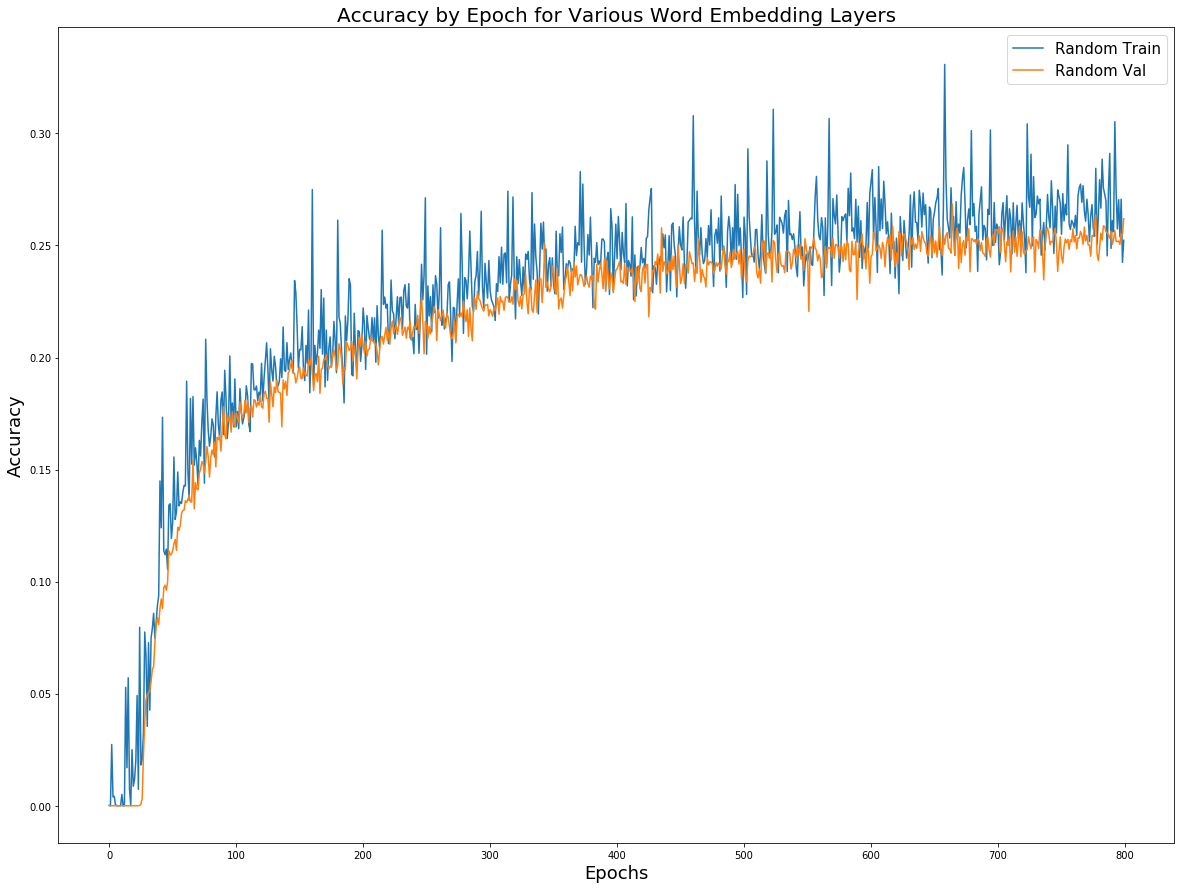

In [17]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_train_accuracy, label='Random Train')
ax.plot(x_axis, random_val_accuracy, label='Random Val')
# ax.plot(x_axis, glove_train_accuracy, label='GloVe Train')
# ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
# ax.plot(x_axis, fasttext_train_accuracy, label='FastText Train')
# ax.plot(x_axis, fasttext_val_accuracy, label='FastText Val')
# ax.plot(x_axis, pp_pca_pp_gpt2_train_accuracy, label='PP PCA PP GPT2 Train')
# ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

### Plot Validation Accuracy from Large Model

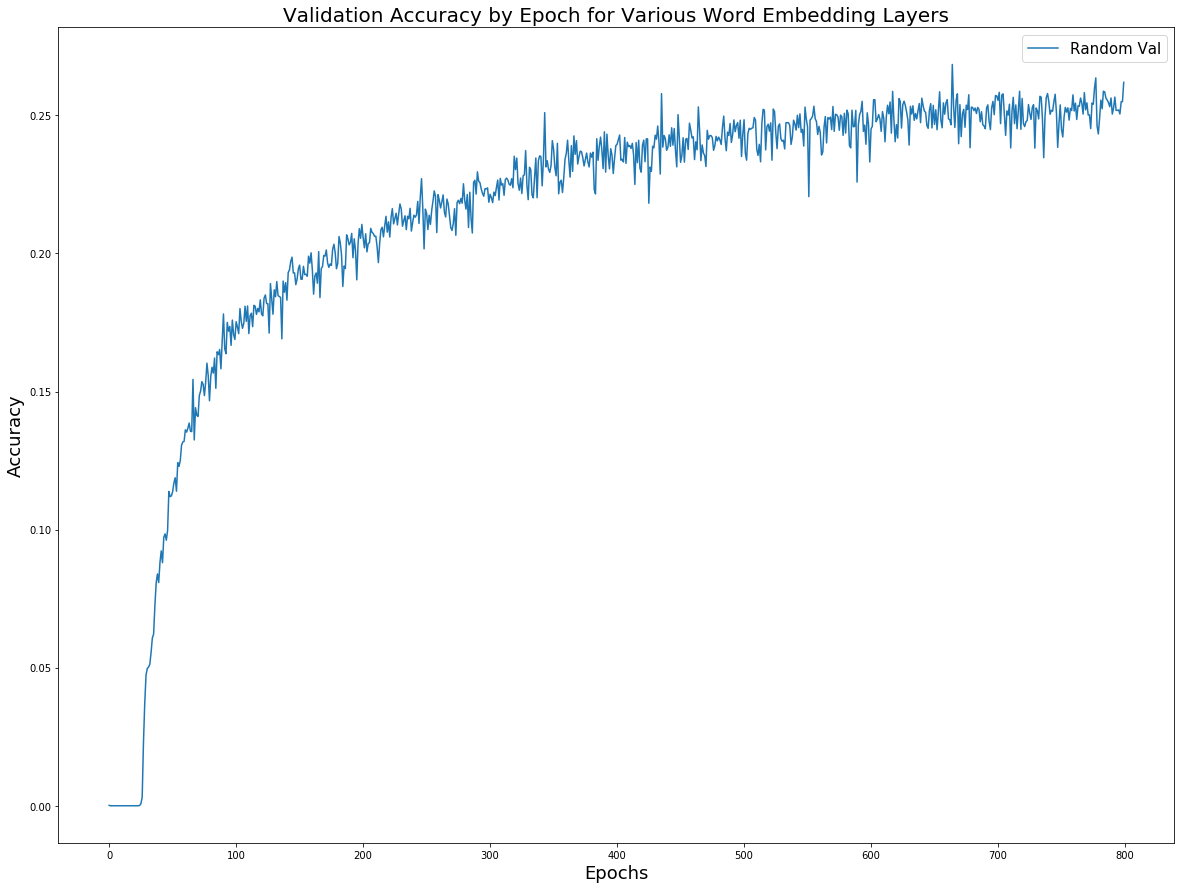

In [18]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x_axis, random_val_accuracy, label='Random Val')
# ax.plot(x_axis, glove_val_accuracy, label='GloVe Val')
# ax.plot(x_axis, fasttext_val_accuracy, label='FastText Val')
# ax.plot(x_axis, pp_pca_pp_gpt2_val_accuracy, label='PP PCA PP GPT2 Val')
ax.legend(loc='best', prop={'size': 15})
plt.title('Validation Accuracy by Epoch for Various Word Embedding Layers', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.show()

# Part 3:  Test Set Performance

### Load Test Dataset and Metrics

In [19]:
VOCAB_SIZE = 10000
BATCH_SIZE = 16
CLIENTS_EPOCHS_PER_ROUND = 1
MAX_SEQ_LENGTH = 20
MAX_ELEMENTS_PER_USER = 5000
CENTRALIZED_TRAIN = False
SHUFFLE_BUFFER_SIZE = 1000
NUM_VALIDATION_EXAMPLES = 2
NUM_TEST_EXAMPLES = 100000

In [20]:
_, _, test_data = dataset.construct_word_level_datasets(
    vocab_size=VOCAB_SIZE,
    batch_size=BATCH_SIZE,
    client_epochs_per_round=CLIENTS_EPOCHS_PER_ROUND,
    max_seq_len=MAX_SEQ_LENGTH,
    max_elements_per_user=MAX_ELEMENTS_PER_USER,
    centralized_train=CENTRALIZED_TRAIN,
    shuffle_buffer_size=SHUFFLE_BUFFER_SIZE,
    num_validation_examples=NUM_VALIDATION_EXAMPLES,
    num_test_examples=NUM_TEST_EXAMPLES)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


In [21]:
extended_vocab_size = VOCAB_SIZE + len(dataset.get_special_tokens(VOCAB_SIZE))
evaluation_metric_names = ['loss',
                           'num_tokens',
                           'num_tokens_no_oov',
                           'num_batches',
                           'num_examples',
                           'accuracy',
                           'accuracy_no_oov',
                           'accuracy_no_oov_no_oes']

metrics_tracker = validation.model_history_tracker(metric_names=evaluation_metric_names)

### Set Small Model Parameters

In [22]:
network = '100_256_100'
EMBEDDING_DIM = 100
RNN_UNITS = 256

### Small Network Random Embedding Test Set Performance

In [23]:
# validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/random_{}/weights.h5'.format(network),
#                                                test_dataset=test_data,
#                                                extended_vocab_size=extended_vocab_size,
#                                                vocab_size=VOCAB_SIZE,
#                                                embedding_dim=EMBEDDING_DIM,
#                                                embedding_matrix='uniform',
#                                                rnn_units=RNN_UNITS,
#                                                metrics_tracker=metrics_tracker,
#                                                stacked_lstm=False,
#                                                rnn_units_2=None)

### Small Network GloVe Embedding Test Set Performance

In [24]:
# validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/glove_{}/weights.h5'.format(network),
#                                                test_dataset=test_data,
#                                                extended_vocab_size=extended_vocab_size,
#                                                vocab_size=VOCAB_SIZE,
#                                                embedding_dim=EMBEDDING_DIM,
#                                                embedding_matrix='uniform',
#                                                rnn_units=RNN_UNITS,
#                                                metrics_tracker=metrics_tracker,
#                                                stacked_lstm=False,
#                                                rnn_units_2=None)

### Small Network PCA FastText Embedding Test Set Performance

In [ ]:
# validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pca_fasttext_{}/weights.h5'.format(network),
#                                                test_dataset=test_data,
#                                                extended_vocab_size=extended_vocab_size,
#                                                vocab_size=VOCAB_SIZE,
#                                                embedding_dim=EMBEDDING_DIM,
#                                                embedding_matrix='uniform',
#                                                rnn_units=RNN_UNITS,
#                                                metrics_tracker=metrics_tracker,
#                                                stacked_lstm=False,
#                                                rnn_units_2=None)

### Small Network PP PCA PP FastText Embedding Test Set Performance

In [ ]:
# validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pp_pca_pp_fasttext_{}/weights.h5'.format(network),
#                                                test_dataset=test_data,
#                                                extended_vocab_size=extended_vocab_size,
#                                                vocab_size=VOCAB_SIZE,
#                                                embedding_dim=EMBEDDING_DIM,
#                                                embedding_matrix='uniform',
#                                                rnn_units=RNN_UNITS,
#                                                metrics_tracker=metrics_tracker,
#                                                stacked_lstm=False,
#                                                rnn_units_2=None)

### Small Network PCA GPT2 Embedding Test Set Performance

In [25]:
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pca_gpt2_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


   1000/Unknown - 115s 115ms/step - loss: 3.3235 - num_tokens: 1346698.0000 - num_tokens_no_oov: 1305425.0000 - num_batches: 1000.0000 - num_examples: 100000.0000 - accuracy: 0.2287 - accuracy_no_oov: 0.2240 - accuracy_no_oov_no_eos: 0.1866loss 3.323472761392593
num_tokens 1346698
num_tokens_no_oov 1305425
num_batches 1000
num_examples 100000
accuracy 0.22870755
accuracy_no_oov 0.2239761
accuracy_no_oov_no_oes 0.18656476


### Small Network PP PCA PP GPT2 Embedding Test Set Performance

In [ ]:
# validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pp_pca_pp_gpt2_{}/weights.h5'.format(network),
#                                                test_dataset=test_data,
#                                                extended_vocab_size=extended_vocab_size,
#                                                vocab_size=VOCAB_SIZE,
#                                                embedding_dim=EMBEDDING_DIM,
#                                                embedding_matrix='uniform',
#                                                rnn_units=RNN_UNITS,
#                                                metrics_tracker=metrics_tracker,
#                                                stacked_lstm=False,
#                                                rnn_units_2=None)

### Set Large Model Parameters

In [26]:
network = '300_512_300'
EMBEDDING_DIM = 300
RNN_UNITS = 512

### Large Network Random Embedding Test Set Performance

In [27]:
validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/random_{}/weights.h5'.format(network),
                                               test_dataset=test_data,
                                               extended_vocab_size=extended_vocab_size,
                                               vocab_size=VOCAB_SIZE,
                                               embedding_dim=EMBEDDING_DIM,
                                               embedding_matrix='uniform',
                                               rnn_units=RNN_UNITS,
                                               metrics_tracker=metrics_tracker,
                                               stacked_lstm=False,
                                               rnn_units_2=None)

/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(
/home/joel_stremmel/anaconda3/envs/tff/lib/python3.7/site-packages/tensorflow_federated/python/simulation/hdf5_client_data.py:64: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  collections.OrderedDict((name, ds.value) for name, ds in sorted(


   1000/Unknown - 179s 179ms/step - loss: 3.2319 - num_tokens: 1340860.0000 - num_tokens_no_oov: 1299012.0000 - num_batches: 1000.0000 - num_examples: 100000.0000 - accuracy: 0.2493 - accuracy_no_oov: 0.2455 - accuracy_no_oov_no_eos: 0.2084loss 3.2318549063205717
num_tokens 1340860
num_tokens_no_oov 1299012
num_batches 1000
num_examples 100000
accuracy 0.24926838
accuracy_no_oov 0.24545193
accuracy_no_oov_no_oes 0.20835885


### Large Network GloVe Embedding Test Set Performance

In [ ]:
# validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/glove_{}/weights.h5'.format(network),
#                                                test_dataset=test_data,
#                                                extended_vocab_size=extended_vocab_size,
#                                                vocab_size=VOCAB_SIZE,
#                                                embedding_dim=EMBEDDING_DIM,
#                                                embedding_matrix='uniform',
#                                                rnn_units=RNN_UNITS,
#                                                metrics_tracker=metrics_tracker,
#                                                stacked_lstm=False,
#                                                rnn_units_2=None)

### Large Network Fasttext Embedding Test Set Performance

In [ ]:
# validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/fasttext_{}/weights.h5'.format(network),
#                                                test_dataset=test_data,
#                                                extended_vocab_size=extended_vocab_size,
#                                                vocab_size=VOCAB_SIZE,
#                                                embedding_dim=EMBEDDING_DIM,
#                                                embedding_matrix='uniform',
#                                                rnn_units=RNN_UNITS,
#                                                metrics_tracker=metrics_tracker,
#                                                stacked_lstm=False,
#                                                rnn_units_2=None)

### Large Network PP PCA PP GPT2 Embedding Test Set Performance

In [ ]:
# validation.load_and_test_model_from_checkpoint(checkpoint='embedding_layer_results/pp_pca_pp_gpt2_{}/weights.h5'.format(network),
#                                                test_dataset=test_data,
#                                                extended_vocab_size=extended_vocab_size,
#                                                vocab_size=VOCAB_SIZE,
#                                                embedding_dim=EMBEDDING_DIM,
#                                                embedding_matrix='uniform',
#                                                rnn_units=RNN_UNITS,
#                                                metrics_tracker=metrics_tracker,
#                                                stacked_lstm=False,
#                                                rnn_units_2=None)